# Tutorial 9

## Question 1
The folder `particle` contains a sequence of images of a bead undergoing [brownian motion](https://en.wikipedia.org/wiki/Brownian_motion). Your goal is to track the movement of the bead by identifying its position in each of the frames.

### Part 1

Follow the steps in the notes to determine the (x, y) co-ordinates of the bead in the image `particle/frame0.png`.
1. Use `np.imread` to convert the image file to a numpy array.
1. Convert the image to greyscale by summing along the final axis.
1. Threshold the array. Determine a value for the threshold which results in just a single 'blob'.
1. Determine the location using the function `sn.center_of_mass` (you do not need to determine the largest blob since there should be only one!)
1. Use `plt.imshow` and `plt.scatter` to mark the location of the bead on the image, like this:

<img src="q1.png" />

(200, 250, 4)


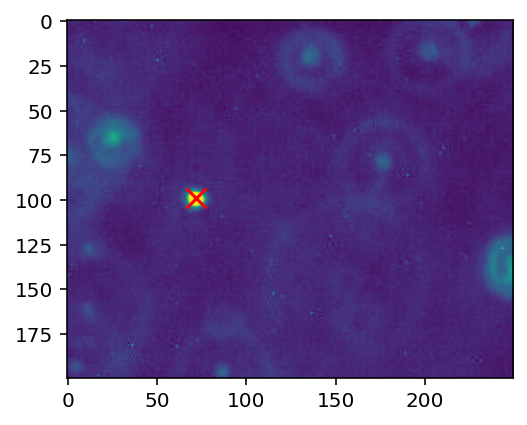

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # import the image module
import scipy.ndimage as sn # import the scipy.ndimage package


x = mpimg.imread("particle/frame0.png") # read the image into an array

z = np.sum(x, 2) # sum the RGBA values for each pixel

thres = 3
x_thres = z > thres # Determine pixels which are above the threshold

x_labels, n = sn.label(x_thres)

location = sn.center_of_mass(x_thres, x_labels, 1) # determine the coordinates of the  blob

plt.figure(figsize=(4,4))
plt.imshow(x)
# arrays are indexed [column, row] whereas scatter plots are ordered [x, y]
# so we need to reverse the order of the indices
plt.scatter(location[1], location[0], color="red", marker="x", s=100)

print(x.shape)


### Part 2

Use your code from Question 1 to write a Python function `get_particle_location(filename)` which returns the (x, y) co-ordinates of the bead in the image file `filename`.

```
loc = get_particle_location("particle/frame0.png")
print(loc)
(98.92857142857143, 71.60714285714286)
```

In [2]:
import scipy.ndimage as sn # import the scipy.ndimage package

def get_particle_location(filename):
    x = mpimg.imread(filename) # read the image into an array

    z = np.sum(x, 2) # sum the RGBA values for each pixel

    thres = 3
    x_thres = z > thres # Determine pixels which are above the threshold
    
    x_labels, n = sn.label(x_thres)

    location = sn.center_of_mass(x_thres, x_labels, 1) # determine the coordinates of the  blob

    return location

loc = get_particle_location("particle/frame0.png")
print(loc)

(98.92857142857143, 71.60714285714286)


### Part 3

By calling your function `get_particle_location` on each of the files, construct a 2 by 10 numpy array containing the co-ordinates of the bead in each of the 10 frames.

Make a plot of x vs time, y vs time and x vs y. Make sure you scale the axes so that they correspond to the dimensions of the image, as below.

<img src="b2.png" /><img src="b3.png" /><img src="b1.png" />

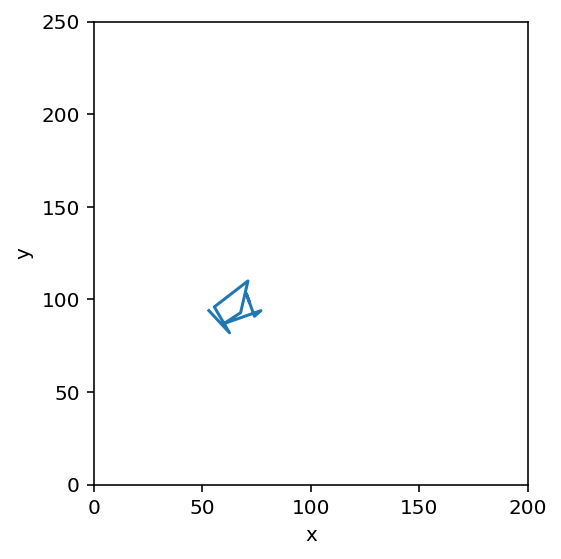

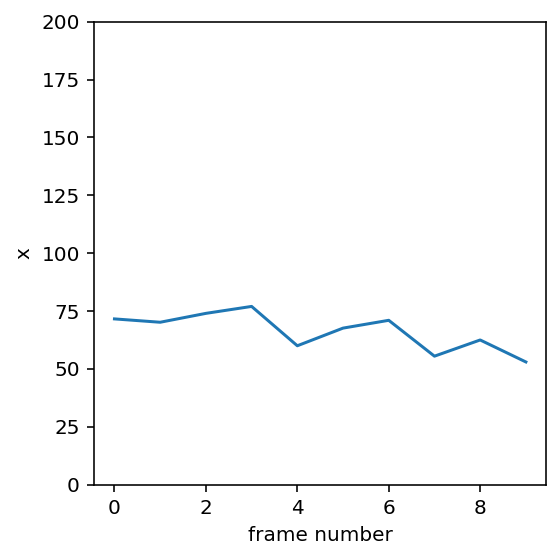

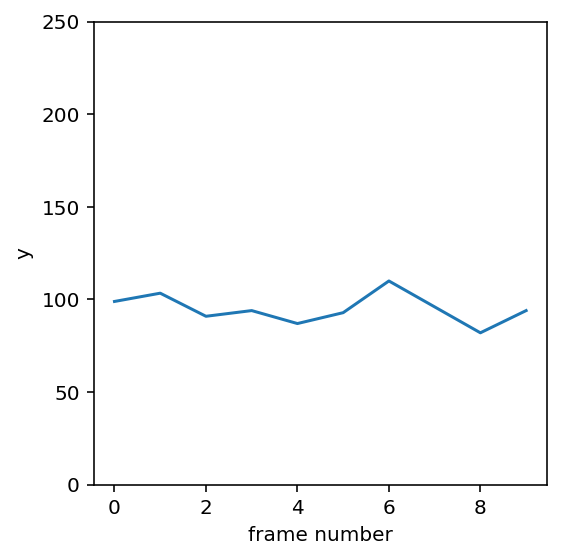

In [3]:
n = 10
z = np.zeros((2,n))

for i in range(n):

    loc = get_particle_location("particle/frame" + str(i) + ".png")
    
    z[:,i] = loc

plt.figure(figsize=(4,4))
plt.plot(z[1,:], z[0,:])
plt.xlim(0, 200)
plt.ylim(0, 250)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('b1.png')


plt.figure(figsize=(4,4))
plt.plot(z[1,:])
plt.ylim(0, 200)
plt.ylabel('x')
plt.xlabel('frame number')
plt.tight_layout()
plt.savefig('b2.png')

plt.figure(figsize=(4,4))
plt.plot(z[0,:])
plt.ylim(0, 250)
plt.xlabel('frame number')
plt.ylabel('y')
plt.tight_layout()
plt.savefig('b3.png')


## Question 2

Repeat the above question for the images noisy images in the folder `particle_noisy`.

For Part 1, you will have to choose a suitable threshold then pick the blob with the largest size, as in the notes.

For Part 3, can you find a value of the threshold that works for all of the images? If not, how could you solve this?


(200, 250, 4)
[[2.1058824 2.1490197 2.9411764 ... 2.1490197 1.6666667 2.007843 ]
 [2.054902  1.5372549 2.627451  ... 2.082353  2.6235294 2.6039214]
 [2.5803924 2.1215687 2.3568628 ... 2.4235294 2.4274511 2.3882353]
 ...
 [1.8352941 2.1803923 2.4039216 ... 3.0117648 2.4       1.5686275]
 [2.6       2.062745  1.4705882 ... 1.5529412 1.772549  2.3529413]
 [2.0941176 2.1921568 2.3843138 ... 2.5490196 2.2156863 1.8627452]]
number of blobs: 4226
sizes: [1. 1. 2. ... 1. 1. 1.]
index: 1993
location: (96.28571428571429, 70.35714285714286)
(200, 250, 4)


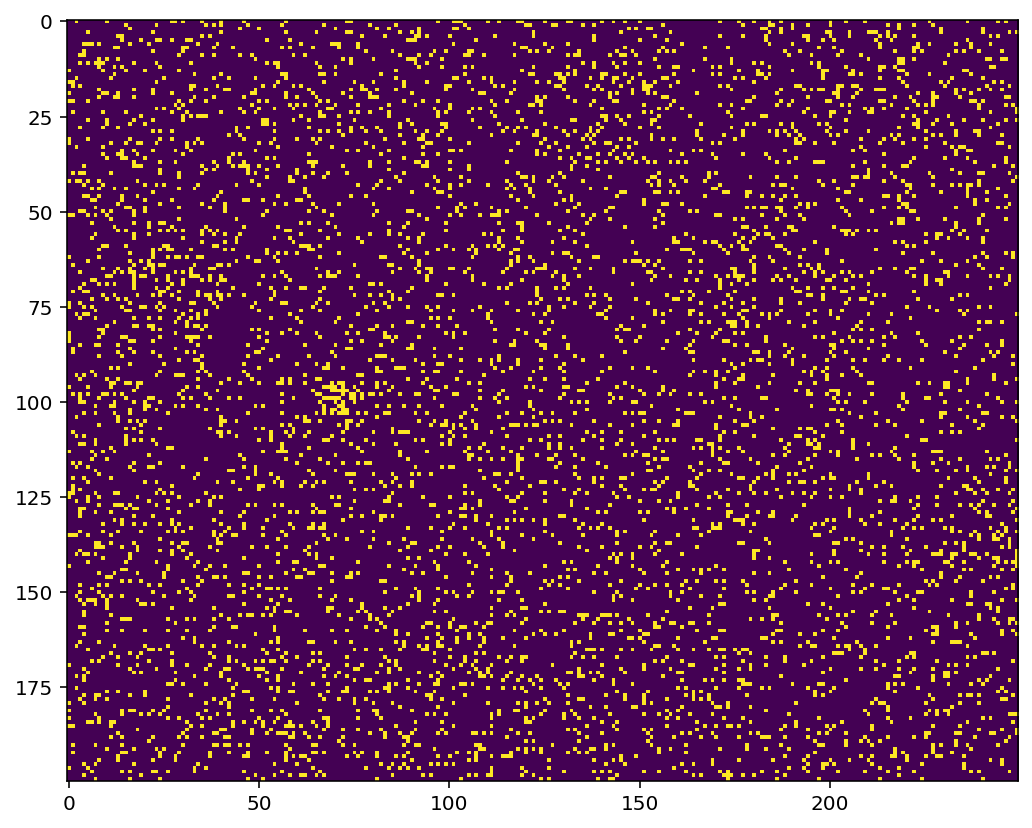

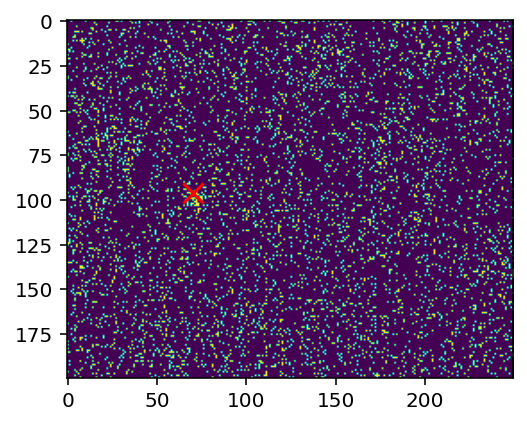

In [4]:
import matplotlib.image as mpimg # import the image module
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as sn # import the scipy.ndimage package

x = mpimg.imread("particle_noisy/frame0.png") # read the image into an array
print(x.shape)

z = np.sum(x, 2) # sum the RGBA values for each pixel
print(z)

thres = 2.7
x_thres = z > thres # Determine pixels which are above the threshold

plt.imshow(x_thres)

x_labels, n = sn.label(x_thres)

print("number of blobs:", n)

sizes = sn.sum(x_thres, x_labels, range(1, n+1))
print("sizes:", sizes)

idx = np.argmax(sizes) # get the index of the largest blob
print("index:", idx)

location = sn.center_of_mass(x_thres, x_labels, idx + 1) # determine the coordinates of the largest blob
print("location:", location)

plt.figure(figsize=(4,4))
plt.imshow(x_thres)
# arrays are indexed [column, row] whereas scatter plots are ordered [x, y]
# so we need to reverse the order of the indices
plt.scatter(location[1], location[0], color="red", marker="x", s=100)

print(x.shape)



Text(0, 0.5, 'y')

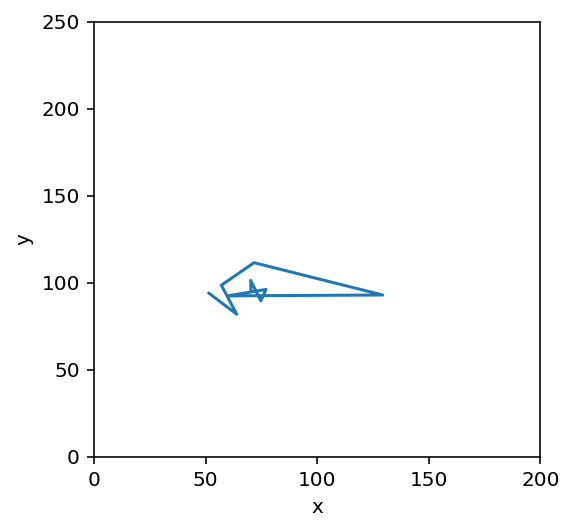

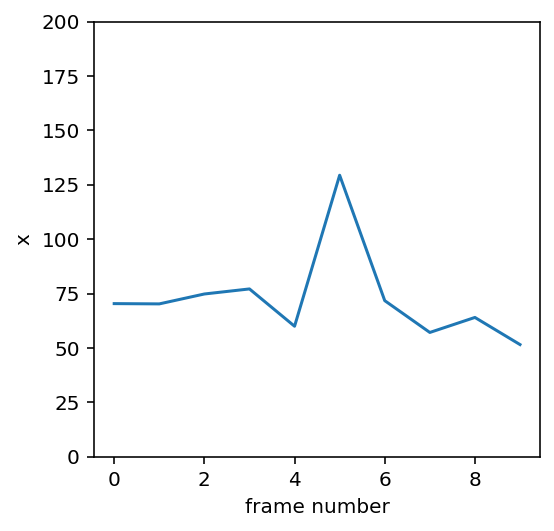

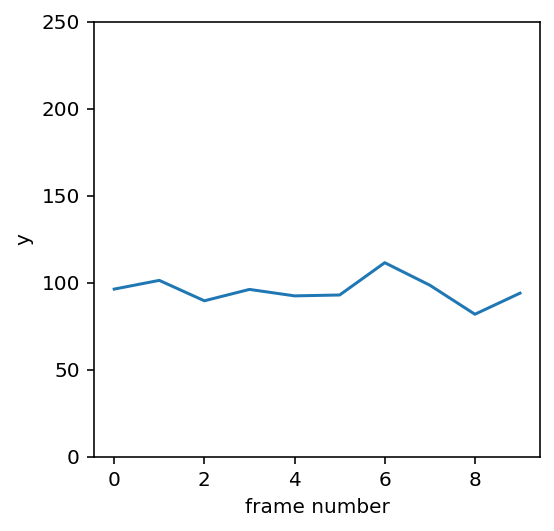

In [5]:
# It's hard to find a single threshold that works for all images.
# We could vary the threshold depending on the image - perhaps based on average brightness of the image.
# However a better solution would be to apply a 'blur' filter by averaging neighbouring pixels before doing the thresholding.
# This would reduce the high frequency noise.

def get_particle_location_2(filename, thres):
    x = mpimg.imread(filename) # read the image into an array

    z = np.sum(x, 2) # sum the RGBA values for each pixel

    x_thres = z > thres # Determine pixels which are above the threshold
    
    x_labels, n = sn.label(x_thres)

    sizes = sn.sum(x_thres, x_labels, range(1, n+1))

    idx = np.argmax(sizes) # get the index of the largest blob

    location = sn.center_of_mass(x_thres, x_labels, idx + 1) # determine the coordinates of the largest blob
    return location

n = 10
z = np.zeros((2,n))

thres = 2.7

for i in range(n):

    loc = get_particle_location_2("particle_noisy/frame" + str(i) + ".png", thres)
    
    z[:,i] = loc

plt.figure(figsize=(4,4))
plt.plot(z[1,:], z[0,:])
plt.xlim(0, 200)
plt.ylim(0, 250)
plt.xlabel('x')
plt.ylabel('y')

plt.figure(figsize=(4,4))
plt.plot(z[1,:])
plt.ylim(0, 200)
plt.ylabel('x')
plt.xlabel('frame number')

plt.figure(figsize=(4,4))
plt.plot(z[0,:])
plt.ylim(0, 250)
plt.xlabel('frame number')
plt.ylabel('y')

